In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, svm, neighbors, ensemble, model_selection, preprocessing, decomposition, metrics

In [15]:
df = pd.read_csv("voice.csv")
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,gender
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  target    3168 non-null   uint

In [47]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,target
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,...,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,...,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752,0.500000
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,...,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454,0.500079
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,...,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,...,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766,0.000000
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,...,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357,0.500000
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,...,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183,1.000000
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,...,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374,1.000000


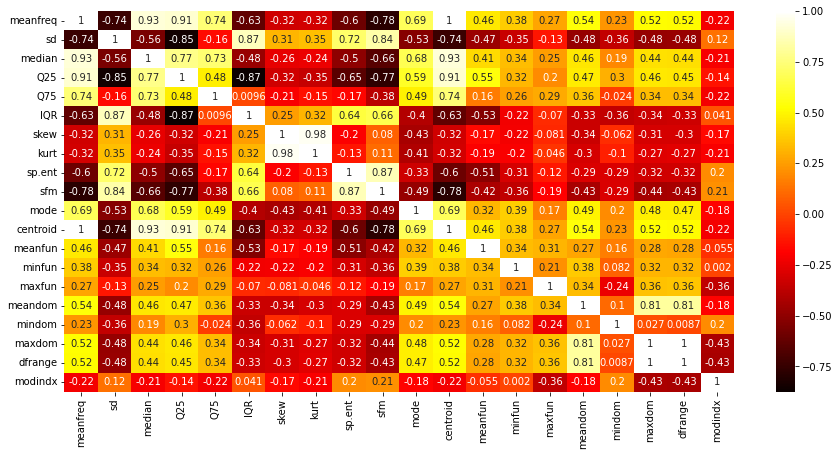

In [125]:
plt.figure(figsize = (15, 7))
sns.heatmap(df.drop('target', axis = 1).corr(), annot = True, cmap = 'hot')
plt.show()

In [16]:
gender = pd.get_dummies(df['gender'])
df = pd.concat([gender, df], axis = 1)
df['target'] = df['female']
df.drop(['male', 'gender', 'female'], axis = 1, inplace = True)
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,target
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,0
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,0
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,0
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,0
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,0


In [29]:
X = df.drop('target', axis = 1)
y = df['target']

In [32]:
scaler = preprocessing.StandardScaler()

scaled_df = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
scaled_df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,-4.049248,0.427355,-4.224901,-2.576102,-5.693607,-0.214778,2.293306,1.762946,-0.039083,0.471575,-2.141210,-4.049248,-1.812038,-1.097998,0.565959,-1.564205,-0.708404,-1.431422,-1.419137,-1.454772
1,-3.841053,0.611670,-3.999293,-2.486885,-5.588987,-0.258485,4.548056,4.433008,-0.065236,0.594431,-2.141210,-3.841053,-1.079594,-1.091533,-0.294030,-1.561916,-0.708404,-1.418107,-1.405818,-1.014103
2,-3.463066,1.603848,-4.095851,-2.706986,-3.928699,0.909326,6.513656,7.326207,-1.083730,0.398261,-2.141210,-3.463066,-1.365368,-1.100397,0.410480,-1.563866,-0.708404,-1.429203,-1.416917,-1.065344
3,-0.992157,0.899998,-0.759454,-0.901418,-0.711205,0.632690,-0.449858,-0.240099,1.516383,1.797340,-1.054576,-0.992157,-1.666966,-0.988934,-0.294030,-1.195367,-0.708404,-1.273867,-1.261532,0.614286
4,-1.530640,1.322561,-1.676948,-1.268395,-0.792029,1.005588,-0.480911,-0.238940,1.708336,2.114740,-0.790514,-1.530640,-1.127233,-1.034015,0.260185,-0.221660,-0.708404,0.124154,0.136933,0.289046


In [38]:
pc = decomposition.PCA(n_components = 5)

new_df = pd.DataFrame(pc.fit_transform(scaled_df), columns = pc.get_feature_names_out())
new_df['target'] = y
new_df.head()

,pca0,pca1,pca2,pca3,pca4,target
0,8.208516,2.164488,1.959784,5.452417,0.930851,0
1,8.671892,3.854627,4.107208,5.079575,0.411480,0
2,9.111169,4.519140,7.528252,3.464543,-0.049165,0
3,4.109261,-0.562341,-1.253138,-0.667666,0.003349,0
4,4.057255,-2.272709,-0.576060,0.962292,-0.183624,0


In [53]:
X = new_df.drop('target', axis = 1).values
y = new_df['target']

lg_scores, svm_scores, rf_scores, knn_scores = [], [], [], []

def train_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

lg = linear_model.LogisticRegression()
svm_ = svm.SVC()
rf = ensemble.RandomForestClassifier(n_estimators = 50)
knn = neighbors.KNeighborsClassifier(n_neighbors = 2)

kf = model_selection.StratifiedKFold(n_splits = 10)

for train_index, test_index in kf.split(X, y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    lg_scores.append(train_model(lg, X_train, X_test, y_train, y_test))
    svm_scores.append(train_model(svm_, X_train, X_test, y_train, y_test))
    rf_scores.append(train_model(rf, X_train, X_test, y_train, y_test))
    knn_scores.append(train_model(knn, X_train, X_test, y_train, y_test))

In [55]:
def avg(li):
    return sum(li) / len(li)

print(avg(lg_scores), avg(svm_scores))
print(avg(rf_scores), avg(knn_scores))

0.8749800343409337 0.9188555684223136
0.9125354390448429 0.8910693606995966


In [63]:
param_grid = {
    'C' : [1, 2, 3, 4, 5],
    'kernel' : ['rbf', 'linear'],
    'gamma' : ['auto', 'scale']
}

classifier = model_selection.GridSearchCV(svm.SVC(), param_grid, cv = 10)

classifier.fit(X, y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5], 'gamma': ['auto', 'scale'],
                         'kernel': ['rbf', 'linear']})

In [64]:
print(classifier.best_params_)
print(classifier.best_score_)

{'C': 2, 'gamma': 'auto', 'kernel': 'rbf'}
0.9213792277283073


In [65]:
temp = pd.DataFrame(classifier.cv_results_)
temp

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.085663,0.007163,0.031705,0.005328,1,auto,rbf,"{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}",0.854890,0.880126,...,0.914826,0.936909,0.977918,0.993691,0.987382,0.838608,0.920886,0.921375,0.051191,2
1,0.185518,0.016964,0.008887,0.005880,1,auto,linear,"{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}",0.722397,0.870662,...,0.917981,0.870662,0.924290,0.958991,0.927445,0.825949,0.895570,0.875306,0.064438,11
2,0.081607,0.006043,0.030909,0.005372,1,scale,rbf,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}",0.861199,0.883281,...,0.914826,0.927445,0.968454,0.993691,0.971609,0.829114,0.943038,0.918856,0.049688,8
3,0.176677,0.015193,0.007749,0.005833,1,scale,linear,"{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}",0.722397,0.870662,...,0.917981,0.870662,0.924290,0.958991,0.927445,0.825949,0.895570,0.875306,0.064438,11
4,0.085765,0.011583,0.025545,0.007582,2,auto,rbf,"{'C': 2, 'gamma': 'auto', 'kernel': 'rbf'}",0.851735,0.873817,...,0.911672,0.940063,0.977918,0.993691,0.984227,0.844937,0.927215,0.921379,0.050965,1
5,0.244212,0.025800,0.008459,0.006587,2,auto,linear,"{'C': 2, 'gamma': 'auto', 'kernel': 'linear'}",0.722397,0.870662,...,0.917981,0.870662,0.924290,0.958991,0.927445,0.825949,0.892405,0.874990,0.064345,13
6,0.070424,0.007795,0.023382,0.007142,2,scale,rbf,"{'C': 2, 'gamma': 'scale', 'kernel': 'rbf'}",0.867508,0.889590,...,0.917981,0.930599,0.968454,0.993691,0.977918,0.825949,0.939873,0.920431,0.049911,4
7,0.158956,0.020318,0.006721,0.006240,2,scale,linear,"{'C': 2, 'gamma': 'scale', 'kernel': 'linear'}",0.722397,0.870662,...,0.917981,0.870662,0.924290,0.958991,0.927445,0.825949,0.892405,0.874990,0.064345,13
8,0.052039,0.004085,0.014818,0.003583,3,auto,rbf,"{'C': 3, 'gamma': 'auto', 'kernel': 'rbf'}",0.845426,0.876972,...,0.908517,0.940063,0.977918,0.993691,0.984227,0.844937,0.927215,0.920748,0.051643,3
9,0.189956,0.024381,0.001052,0.003156,3,auto,linear,"{'C': 3, 'gamma': 'auto', 'kernel': 'linear'}",0.722397,0.870662,...,0.917981,0.870662,0.924290,0.958991,0.927445,0.825949,0.892405,0.874990,0.064345,13


In [74]:
param_grid = {
    'n_estimators' : [50, 60, 70, 80, 100],
    'criterion' : ['gini'],
    'bootstrap' : [True]
}

classifier = model_selection.GridSearchCV(ensemble.RandomForestClassifier(), param_grid, cv = 10)

classifier.fit(X, y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini'],
                         'n_estimators': [50, 60, 70, 80, 100]})

In [76]:
print(classifier.best_params_)
print(classifier.best_score_)

{'bootstrap': True, 'criterion': 'gini', 'n_estimators': 50}
0.9128459050433255


In [72]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 1)

In [77]:
model = svm.SVC(kernel = 'rbf', C = 2, gamma = 'auto')

model.fit(X_train, y_train)

SVC(C=2, gamma='auto')

In [79]:
y_predicted = model.predict(X_test)

print(model.score(X_test, y_test))

0.9369085173501577


In [84]:
print(metrics.r2_score(y_test, y_predicted))
print(metrics.classification_report(y_test, y_predicted))

0.7475436273680227
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       323
           1       0.94      0.93      0.94       311

    accuracy                           0.94       634
   macro avg       0.94      0.94      0.94       634
weighted avg       0.94      0.94      0.94       634



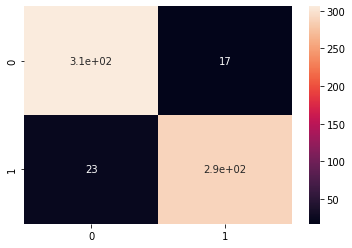

In [85]:
sns.heatmap(metrics.confusion_matrix(y_test, y_predicted), annot = True)
plt.show()